In [2]:
import pandas as pd

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

import requests
from urllib.parse import unquote

headers = {
	"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0",
}

def main(url):
	with requests.Session() as req:
		req.headers.update(headers)
		r = req.get(url[:25])
		req.headers.update({'X-XSRF-TOKEN': unquote(r.cookies.get_dict()['XSRF-TOKEN'])})
		params = {
			"list": "futures.contractInRoot",
			'root': 'VI',
			"fields": "symbol,symbolName,lastPrice,priceChange,percentChange,lastUpdate",
			"orderBy": "expiration",
			"orderDir": "desc",
			"between(lastPrice,.10,)": "",
			"between(tradeTime,2022-01-01,2022-12-30)": "",
			"meta": "field.shortName,field.type,field.description",
			"hasOptions": "true",
			"page": "1",
			"limit": "500",
			"raw": "1"
		}
		r = req.get(url, params=params).json()
		df = pd.DataFrame(r['data'])
		df.to_csv("VxTerm.csv", index=False)
		print(df)
main('https://www.barchart.com/proxies/core-api/v1/quotes/get?')

  symbol   symbolName lastPrice priceChange percentChange         lastUpdate  \
0  VIY00  S&P 500 VIX     12.51       +0.14        +1.13%  07/09/24 15:33:58   
1  VIN24  S&P 500 VIX   13.0300     -0.0520        -0.40%  07/09/24 15:33:58   
2  VIQ24  S&P 500 VIX   14.2200     +0.0382        +0.27%  07/09/24 15:33:58   
3  VIU24  S&P 500 VIX   15.2200     +0.1091        +0.72%  07/09/24 15:33:58   
4  VIV24  S&P 500 VIX   17.5900     +0.0890        +0.51%  07/09/24 15:33:58   
5  VIX24  S&P 500 VIX   17.1300     +0.0300        +0.18%  07/09/24 15:33:58   
6  VIZ24  S&P 500 VIX   16.9300     -0.0200        -0.12%  07/09/24 15:33:58   
7  VIF25  S&P 500 VIX   17.7700     +0.2200        +1.25%  07/09/24 15:33:58   
8  VIG25  S&P 500 VIX   18.0700     +0.0950        +0.53%  07/09/24 15:33:58   
9  VIH25  S&P 500 VIX   18.3000     +0.0500        +0.27%  07/09/24 15:33:58   

                                                 raw  
0  {'symbol': 'VIY00', 'symbolName': 'S&P 500 VIX...  
1  {'symb

In [4]:
import pandas as pd
import requests
from urllib.parse import unquote
from IPython.display import display, HTML

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0",
}

def main(url):
    with requests.Session() as req:
        req.headers.update(headers)
        r = req.get(url[:25])
        req.headers.update(
            {'X-XSRF-TOKEN': unquote(r.cookies.get_dict()['XSRF-TOKEN'])})
        params = {
            "list": "futures.contractInRoot",
            'root': 'VI',
            "fields": "symbol,symbolName,lastPrice,priceChange,percentChange,lastUpdate",
            "orderBy": "expiration",
            "orderDir": "desc",
            "hasOptions": "true",
            "page": "1",
            "limit": "500",
            "raw": "1"
        }
        r = req.get(url, params=params).json()
        df = pd.DataFrame(r['data'])
        
        # Remove non-numeric characters from priceChange and percentChange columns
        df['priceChange'] = df['priceChange'].str.replace(r'[^\d.-]+', '', regex=True)
        df['percentChange'] = df['percentChange'].str.replace(r'[^\d.-]+', '', regex=True)
        
        # Replace empty strings with NaN in priceChange and percentChange columns
        df['priceChange'] = df['priceChange'].replace('', float('nan'))
        df['percentChange'] = df['percentChange'].replace('', float('nan'))
        
        # Convert priceChange and percentChange columns to float
        df['priceChange'] = df['priceChange'].astype(float)
        df['percentChange'] = df['percentChange'].astype(float)
        
        # Exclude the 'raw' column
        df = df.drop('raw', axis=1)

        # Apply conditional formatting to priceChange and percentChange columns
        styled_df = df.style.applymap(
            lambda x: 'color: green' if x > 0 else ('color: red' if x < 0 else 'color: grey'),
            subset=['priceChange', 'percentChange'])

        # Render the styled dataframe
        display(HTML(styled_df.render()))

        df.to_csv("VxTerm.csv", index=False)

main('https://www.barchart.com/proxies/core-api/v1/quotes/get?')


/var/folders/16/t1lsggv91tj_dfd8v694d9tw0000gn/T/ipykernel_18349/155924415.py:55: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  display(HTML(styled_df.render()))


,symbol,symbolName,lastPrice,priceChange,percentChange,lastUpdate
0,VIY00,S&P 500 VIX,12.51,0.140000,1.130000,07/09/24 15:33:58
1,VIN24,S&P 500 VIX,13.0300,-0.052000,-0.400000,07/09/24 15:33:58
2,VIQ24,S&P 500 VIX,14.2200,0.038200,0.270000,07/09/24 15:33:58
3,VIU24,S&P 500 VIX,15.2200,0.109100,0.720000,07/09/24 15:33:58
4,VIV24,S&P 500 VIX,17.5900,0.089000,0.510000,07/09/24 15:33:58
5,VIX24,S&P 500 VIX,17.1300,0.030000,0.180000,07/09/24 15:33:58
6,VIZ24,S&P 500 VIX,16.9300,-0.020000,-0.120000,07/09/24 15:33:58
7,VIF25,S&P 500 VIX,17.7700,0.220000,1.250000,07/09/24 15:33:58
8,VIG25,S&P 500 VIX,18.0700,0.095000,0.530000,07/09/24 15:33:58
9,VIH25,S&P 500 VIX,18.3000,0.050000,0.270000,07/09/24 15:33:58


In [6]:
import pandas as pd
import requests
from urllib.parse import unquote
from IPython.display import display, HTML

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0",
}

def main(url):
    with requests.Session() as req:
        req.headers.update(headers)
        r = req.get(url[:25])
        req.headers.update(
            {'X-XSRF-TOKEN': unquote(r.cookies.get_dict()['XSRF-TOKEN'])})
        params = {
            "list": "futures.contractInRoot",
            'root': 'VI',
            "fields": "symbol,symbolName,lastPrice,priceChange,percentChange,lastUpdate",
            "orderBy": "expiration",
            "orderDir": "desc",
            "hasOptions": "true",
            "page": "1",
            "limit": "500",
            "raw": "1"
        }
        r = req.get(url, params=params).json()
        df = pd.DataFrame(r['data'])
        
        # Remove non-numeric characters from priceChange and percentChange columns
        df['priceChange'] = df['priceChange'].str.replace(r'[^\d.-]+', '', regex=True)
        df['percentChange'] = df['percentChange'].str.replace(r'[^\d.-]+', '', regex=True)
        
        # Replace empty strings with NaN in priceChange and percentChange columns
        df['priceChange'] = df['priceChange'].replace('', pd.NA)
        df['percentChange'] = df['percentChange'].replace('', pd.NA)
        
        # Convert priceChange and percentChange columns to float
        df['priceChange'] = pd.to_numeric(df['priceChange'], errors='coerce')
        df['percentChange'] = pd.to_numeric(df['percentChange'], errors='coerce')
        
        # Exclude the 'raw' column
        df = df.drop('raw', axis=1)

        # Apply conditional formatting to priceChange and percentChange columns
        styled_df = df.style.applymap(
            lambda x: 'color: green' if x > 0 else ('color: red' if x < 0 else 'color: grey'),
            subset=['priceChange', 'percentChange'])

        # Render the styled dataframe
        display(HTML(styled_df.render()))

        df.to_csv("VxTerm.csv", index=False)
        

main('https://www.barchart.com/proxies/core-api/v1/quotes/get?')


/var/folders/16/t1lsggv91tj_dfd8v694d9tw0000gn/T/ipykernel_18349/2878555790.py:55: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  display(HTML(styled_df.render()))


,symbol,symbolName,lastPrice,priceChange,percentChange,lastUpdate
0,VIY00,S&P 500 VIX,12.51,0.140000,1.130000,07/09/24 15:33:58
1,VIN24,S&P 500 VIX,13.0300,-0.052000,-0.400000,07/09/24 15:33:58
2,VIQ24,S&P 500 VIX,14.2200,0.038200,0.270000,07/09/24 15:33:58
3,VIU24,S&P 500 VIX,15.2200,0.109100,0.720000,07/09/24 15:33:58
4,VIV24,S&P 500 VIX,17.5900,0.089000,0.510000,07/09/24 15:33:58
5,VIX24,S&P 500 VIX,17.1300,0.030000,0.180000,07/09/24 15:33:58
6,VIZ24,S&P 500 VIX,16.9300,-0.020000,-0.120000,07/09/24 15:33:58
7,VIF25,S&P 500 VIX,17.7700,0.220000,1.250000,07/09/24 15:33:58
8,VIG25,S&P 500 VIX,18.0700,0.095000,0.530000,07/09/24 15:33:58
9,VIH25,S&P 500 VIX,18.3000,0.050000,0.270000,07/09/24 15:33:58


In [8]:
import pandas as pd
import requests
from urllib.parse import unquote
from IPython.display import display, HTML

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0",
}

def main(url):
    with requests.Session() as req:
        req.headers.update(headers)
        r = req.get(url[:25])
        req.headers.update(
            {'X-XSRF-TOKEN': unquote(r.cookies.get_dict()['XSRF-TOKEN'])})
        params = {
            "list": "futures.contractInRoot",
            'root': 'VI',
            "fields": "symbol,symbolName,lastPrice,priceChange,percentChange,lastUpdate,volume,openInterest",
            "orderBy": "expiration",
            "orderDir": "desc",
            "hasOptions": "true",
            "page": "1",
            "limit": "500",
            "raw": "1"
        }
        r = req.get(url, params=params).json()
        df = pd.DataFrame(r['data'])
        
        # Remove non-numeric characters from priceChange and percentChange columns
        df['priceChange'] = df['priceChange'].str.replace(r'[^\d.-]+', '', regex=True)
        df['percentChange'] = df['percentChange'].str.replace(r'[^\d.-]+', '', regex=True)
        
        # Replace empty strings with NaN in priceChange and percentChange columns
        df['priceChange'] = df['priceChange'].replace('', pd.NA)
        df['percentChange'] = df['percentChange'].replace('', pd.NA)
        
        # Convert priceChange and percentChange columns to float
        df['priceChange'] = pd.to_numeric(df['priceChange'], errors='coerce')
        df['percentChange'] = pd.to_numeric(df['percentChange'], errors='coerce')
        
        # Exclude the 'raw' column
        df = df.drop('raw', axis=1)

        # Apply conditional formatting to priceChange and percentChange columns
        styled_df = df.style.format({'percentChange': '{:.2f}%'}).applymap(
            lambda x: 'color: green' if x > 0 else ('color: red' if x < 0 else 'color: grey'),
            subset=['priceChange', 'percentChange']
        ).format({'percentChange': lambda x: f"{x}%"})

        # Render the styled dataframe
        display(HTML(styled_df.render()))

        df.to_csv("VxTerm.csv", index=False)
        

main('https://www.barchart.com/proxies/core-api/v1/quotes/get?')


/var/folders/16/t1lsggv91tj_dfd8v694d9tw0000gn/T/ipykernel_18349/1607015862.py:56: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  display(HTML(styled_df.render()))


,symbol,symbolName,lastPrice,priceChange,percentChange,lastUpdate,volume,openInterest
0,VIY00,S&P 500 VIX,12.51,0.140000,1.13%,07/09/24 15:33:58,N/A,N/A
1,VIN24,S&P 500 VIX,13.0300,-0.052000,-0.4%,07/09/24 15:33:58,"68,098","143,829"
2,VIQ24,S&P 500 VIX,14.2200,0.038200,0.27%,07/09/24 15:33:58,"52,584","136,011"
3,VIU24,S&P 500 VIX,15.2200,0.109100,0.72%,07/09/24 15:33:58,"20,873","78,226"
4,VIV24,S&P 500 VIX,17.5900,0.089000,0.51%,07/09/24 15:33:58,"10,536","46,572"
5,VIX24,S&P 500 VIX,17.1300,0.030000,0.18%,07/09/24 15:33:58,"7,145","37,106"
6,VIZ24,S&P 500 VIX,16.9300,-0.020000,-0.12%,07/09/24 15:33:58,"3,779","14,261"
7,VIF25,S&P 500 VIX,17.7700,0.220000,1.25%,07/09/24 15:33:58,"1,373","4,603"
8,VIG25,S&P 500 VIX,18.0700,0.095000,0.53%,07/09/24 15:33:58,216,0
9,VIH25,S&P 500 VIX,18.3000,0.050000,0.27%,07/09/24 15:33:58,7,0


In [10]:
import pandas as pd
import requests
from urllib.parse import unquote
from IPython.display import display, HTML

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0",
}

def main(url):
    with requests.Session() as req:
        req.headers.update(headers)
        r = req.get(url[:25])
        req.headers.update(
            {'X-XSRF-TOKEN': unquote(r.cookies.get_dict()['XSRF-TOKEN'])})
        params = {
            "list": "futures.contractInRoot",
            'root': 'VI',
            "fields": "symbol,symbolName,lastPrice,priceChange,percentChange,lastUpdate,volume,openInterest",
            "orderBy": "expiration",
            "orderDir": "desc",
            "hasOptions": "true",
            "page": "1",
            "limit": "500",
            "raw": "1"
        }
        r = req.get(url, params=params).json()
        df = pd.DataFrame(r['data'])
        
        # Remove non-numeric characters from priceChange and percentChange columns
        df['priceChange'] = df['priceChange'].str.replace(r'[^\d.-]+', '', regex=True)
        df['percentChange'] = df['percentChange'].str.replace(r'[^\d.-]+', '', regex=True)
        
        # Replace empty strings with NaN in priceChange and percentChange columns
        df['priceChange'] = df['priceChange'].replace('', pd.NA)
        df['percentChange'] = df['percentChange'].replace('', pd.NA)
        
        # Convert priceChange and percentChange columns to float
        df['priceChange'] = pd.to_numeric(df['priceChange'], errors='coerce')
        df['percentChange'] = pd.to_numeric(df['percentChange'], errors='coerce')
        
        # Exclude the 'raw' column
        df = df.drop('raw', axis=1)

        # Apply conditional formatting to priceChange and percentChange columns
        styled_df = df.style.format({'percentChange': '{:.2f}%'}).applymap(
            lambda x: 'color: green' if x > 0 else ('color: red' if x < 0 else 'color: grey'),
            subset=['priceChange', 'percentChange']
        ).format({'percentChange': lambda x: f"{x}%"})

        # Render the styled dataframe using to_html()
        display(HTML(styled_df.to_html()))

        df.to_csv("VxTerm.csv", index=False)
        

main('https://www.barchart.com/proxies/core-api/v1/quotes/get?')


,symbol,symbolName,lastPrice,priceChange,percentChange,lastUpdate,volume,openInterest
0,VIY00,S&P 500 VIX,12.51,0.140000,1.13%,07/09/24 15:33:58,N/A,N/A
1,VIN24,S&P 500 VIX,13.0300,-0.052000,-0.4%,07/09/24 15:33:58,"68,098","143,829"
2,VIQ24,S&P 500 VIX,14.2200,0.038200,0.27%,07/09/24 15:33:58,"52,584","136,011"
3,VIU24,S&P 500 VIX,15.2200,0.109100,0.72%,07/09/24 15:33:58,"20,873","78,226"
4,VIV24,S&P 500 VIX,17.5900,0.089000,0.51%,07/09/24 15:33:58,"10,536","46,572"
5,VIX24,S&P 500 VIX,17.1300,0.030000,0.18%,07/09/24 15:33:58,"7,145","37,106"
6,VIZ24,S&P 500 VIX,16.9300,-0.020000,-0.12%,07/09/24 15:33:58,"3,779","14,261"
7,VIF25,S&P 500 VIX,17.7700,0.220000,1.25%,07/09/24 15:33:58,"1,373","4,603"
8,VIG25,S&P 500 VIX,18.0700,0.095000,0.53%,07/09/24 15:33:58,216,0
9,VIH25,S&P 500 VIX,18.3000,0.050000,0.27%,07/09/24 15:33:58,7,0


In [12]:
import pandas as pd

# Load the CSV file that contains the data
df = pd.read_csv("VxTerm.csv")

# Function to calculate roll yield
def calculate_roll_yield(current_price, next_price):
    return (float(current_price) - float(next_price)) / float(current_price) * 100  # Calculate roll yield correctly

# Calculate roll yield for each pair of consecutive contracts and determine contango/backwardation
roll_yields = []
contango_backwardation = []
long_short = []  # Added column for long/short
for i in range(len(df) - 1):
    current_price_value = df.iloc[i]['lastPrice']
    next_price_value = df.iloc[i + 1]['lastPrice']
    
    # Check if the value is a string and contains 's' character, then remove 's' and convert to float
    if isinstance(current_price_value, str) and current_price_value.endswith('s'):
        current_price = float(current_price_value[:-1])
    else:
        current_price = float(current_price_value)
    
    if isinstance(next_price_value, str) and next_price_value.endswith('s'):
        next_price = float(next_price_value[:-1])
    else:
        next_price = float(next_price_value)
    
    roll_yield = calculate_roll_yield(current_price, next_price)
    roll_yields.append(roll_yield)
    
    if roll_yield < 0:
        contango_backwardation.append("Contango")
        long_short.append("Long (Green)")
    elif roll_yield > 0:
        contango_backwardation.append("Backwardation")
        long_short.append("Short (Red)")
    else:
        contango_backwardation.append("No Change")
        long_short.append("No Trade")

# Print the roll yield values with formatting and contango/backwardation
for i, (roll_yield, cb, ls) in enumerate(zip(roll_yields, contango_backwardation, long_short)):
    color = 'red' if roll_yield > 0 else 'green'
    formatted_roll_yield = "{:.2f}%".format(abs(roll_yield))
    print(f"Roll Yield {i+1}: \033[91m{formatted_roll_yield}\033[0m ({cb}) {ls}" if roll_yield < 0 else f"Roll Yield {i+1}: \033[92m{formatted_roll_yield}\033[0m ({cb}) {ls}")

# Note: The last contract does not have a roll yield value


Roll Yield 1: 4.16% (Contango) Long (Green)
Roll Yield 2: 9.13% (Contango) Long (Green)
Roll Yield 3: 7.03% (Contango) Long (Green)
Roll Yield 4: 15.57% (Contango) Long (Green)
Roll Yield 5: 2.62% (Backwardation) Short (Red)
Roll Yield 6: 1.17% (Backwardation) Short (Red)
Roll Yield 7: 4.96% (Contango) Long (Green)
Roll Yield 8: 1.69% (Contango) Long (Green)
Roll Yield 9: 1.27% (Contango) Long (Green)


In [14]:
import pandas as pd

# Load the CSV file that contains the data
df = pd.read_csv("VxTerm.csv")

# Function to calculate roll yield
def calculate_roll_yield(current_price, next_price):
    if pd.notna(current_price) and pd.notna(next_price):
        return (float(current_price) - float(next_price)) / float(current_price) * 100
    else:
        return float('nan')

# Calculate roll yield for each pair of consecutive contracts and determine contango/backwardation
roll_yields = []
contango_backwardation = []
long_short = []  # Added column for long/short
for i in range(len(df) - 1):
    current_price = df.iloc[i]['lastPrice']
    next_price = df.iloc[i + 1]['lastPrice']
    
    roll_yield = calculate_roll_yield(current_price, next_price)
    roll_yields.append(roll_yield)
    
    if pd.notna(roll_yield):
        if roll_yield < 0:
            contango_backwardation.append("Contango")
            long_short.append("Long (Green)")
        elif roll_yield > 0:
            contango_backwardation.append("Backwardation")
            long_short.append("Short (Red)")
        else:
            contango_backwardation.append("No Change")
            long_short.append("No Trade")
    else:
        contango_backwardation.append("N/A")
        long_short.append("N/A")

# Print the roll yield values with formatting and contango/backwardation
for i, (roll_yield, cb, ls) in enumerate(zip(roll_yields, contango_backwardation, long_short)):
    if pd.notna(roll_yield):
        color = 'red' if roll_yield > 0 else 'green'
        formatted_roll_yield = "{:.2f}%".format(abs(roll_yield))
        print(f"Roll Yield {i+1}: \033[91m{formatted_roll_yield}\033[0m ({cb}) {ls}" if roll_yield < 0 else f"Roll Yield {i+1}: \033[92m{formatted_roll_yield}\033[0m ({cb}) {ls}")
    else:
        print(f"Roll Yield {i+1}: N/A (N/A) N/A")

# Note: The last contract does not have a roll yield value


Roll Yield 1: 4.16% (Contango) Long (Green)
Roll Yield 2: 9.13% (Contango) Long (Green)
Roll Yield 3: 7.03% (Contango) Long (Green)
Roll Yield 4: 15.57% (Contango) Long (Green)
Roll Yield 5: 2.62% (Backwardation) Short (Red)
Roll Yield 6: 1.17% (Backwardation) Short (Red)
Roll Yield 7: 4.96% (Contango) Long (Green)
Roll Yield 8: 1.69% (Contango) Long (Green)
Roll Yield 9: 1.27% (Contango) Long (Green)


In [16]:
import pandas as pd

# Load the CSV file that contains the data
df = pd.read_csv("VxTerm.csv")

# Function to calculate roll yield
def calculate_roll_yield(current_price, next_price):
    try:
        current_price = float(current_price)
        next_price = float(next_price)
        return (current_price - next_price) / current_price * 100
    except (ValueError, TypeError):
        return float('nan')

# Calculate roll yield for each pair of consecutive contracts and determine contango/backwardation
roll_yields = []
contango_backwardation = []
long_short = []  # Added column for long/short
for i in range(len(df) - 1):
    current_price = df.iloc[i]['lastPrice']
    next_price = df.iloc[i + 1]['lastPrice']
    
    roll_yield = calculate_roll_yield(current_price, next_price)
    roll_yields.append(roll_yield)
    
    if pd.notna(roll_yield):
        if roll_yield < 0:
            contango_backwardation.append("Contango")
            long_short.append("Long (Green)")
        elif roll_yield > 0:
            contango_backwardation.append("Backwardation")
            long_short.append("Short (Red)")
        else:
            contango_backwardation.append("No Change")
            long_short.append("No Trade")
    else:
        contango_backwardation.append("N/A")
        long_short.append("N/A")

# Print the roll yield values with formatting and contango/backwardation
for i, (roll_yield, cb, ls) in enumerate(zip(roll_yields, contango_backwardation, long_short)):
    if pd.notna(roll_yield):
        color = 'red' if roll_yield > 0 else 'green'
        formatted_roll_yield = "{:.2f}%".format(abs(roll_yield))
        print(f"Roll Yield {i+1}: \033[91m{formatted_roll_yield}\033[0m ({cb}) {ls}" if roll_yield < 0 else f"Roll Yield {i+1}: \033[92m{formatted_roll_yield}\033[0m ({cb}) {ls}")
    else:
        print(f"Roll Yield {i+1}: N/A (N/A) N/A")

# Note: The last contract does not have a roll yield value


Roll Yield 1: 4.16% (Contango) Long (Green)
Roll Yield 2: 9.13% (Contango) Long (Green)
Roll Yield 3: 7.03% (Contango) Long (Green)
Roll Yield 4: 15.57% (Contango) Long (Green)
Roll Yield 5: 2.62% (Backwardation) Short (Red)
Roll Yield 6: 1.17% (Backwardation) Short (Red)
Roll Yield 7: 4.96% (Contango) Long (Green)
Roll Yield 8: 1.69% (Contango) Long (Green)
Roll Yield 9: 1.27% (Contango) Long (Green)


In [18]:
import pandas as pd

# Load the CSV file that contains the data
df = pd.read_csv("VxTerm.csv")

# Function to calculate roll yield
def calculate_roll_yield(current_price, next_price):
    return (float(current_price) - float(next_price)) / float(current_price) * 100  # Calculate roll yield correctly

# Calculate roll yield for each pair of consecutive contracts and determine contango/backwardation
roll_yields = []
contango_backwardation = []
long_short = []  # Added column for long/short
for i in range(len(df) - 1):
    current_price = df.iloc[i]['lastPrice']
    next_price = df.iloc[i + 1]['lastPrice']
    
    current_price = float(current_price)
    next_price = float(next_price)
    
    roll_yield = calculate_roll_yield(current_price, next_price)
    roll_yields.append(roll_yield)
    
    if roll_yield > 0:
        contango_backwardation.append("Contango")  # Reversed interpretation
        long_short.append("Long (Green)")  # Reversed interpretation
    elif roll_yield < 0:
        contango_backwardation.append("Backwardation")  # Reversed interpretation
        long_short.append("Short (Red)")  # Reversed interpretation
    else:
        contango_backwardation.append("No Change")
        long_short.append("No Trade")

# Print the roll yield values with formatting and contango/backwardation
for i, (roll_yield, cb, ls) in enumerate(zip(roll_yields, contango_backwardation, long_short)):
    color = 'green' if roll_yield > 0 else 'red'  # Swap colors here
    formatted_roll_yield = "{:.2f}%".format(abs(roll_yield))
    print(f"Roll Yield {i+1}: \033[91m{formatted_roll_yield}\033[0m ({cb}) {ls}" if roll_yield < 0 else f"Roll Yield {i+1}: \033[92m{formatted_roll_yield}\033[0m ({cb}) {ls}")

# Note: The last contract does not have a roll yield value


Roll Yield 1: 4.16% (Backwardation) Short (Red)
Roll Yield 2: 9.13% (Backwardation) Short (Red)
Roll Yield 3: 7.03% (Backwardation) Short (Red)
Roll Yield 4: 15.57% (Backwardation) Short (Red)
Roll Yield 5: 2.62% (Contango) Long (Green)
Roll Yield 6: 1.17% (Contango) Long (Green)
Roll Yield 7: 4.96% (Backwardation) Short (Red)
Roll Yield 8: 1.69% (Backwardation) Short (Red)
Roll Yield 9: 1.27% (Backwardation) Short (Red)


In [20]:
import pandas as pd

# Load the CSV file that contains the data
df = pd.read_csv("VxTerm.csv")

# Function to calculate roll yield
def calculate_roll_yield(current_price, next_price):
    return (current_price - next_price) / current_price * 100  # Calculate roll yield correctly

# Calculate roll yield for each pair of consecutive contracts and determine contango/backwardation
roll_yields = []
contango_backwardation = []
long_short = []  # Added column for long/short
for i in range(len(df) - 1):
    current_price = df.iloc[i]['lastPrice']
    next_price = df.iloc[i + 1]['lastPrice']
    
    roll_yield = calculate_roll_yield(current_price, next_price)
    roll_yields.append(roll_yield)
    
    if roll_yield > 0:
        contango_backwardation.append("Backwardation")  # Reversed interpretation
        long_short.append("Short (Red)")  # Reversed interpretation
    elif roll_yield < 0:
        contango_backwardation.append("Contango")  # Reversed interpretation
        long_short.append("Long (Green)")  # Reversed interpretation
    else:
        contango_backwardation.append("No Change")
        long_short.append("No Trade")

# Print the roll yield values with formatting and contango/backwardation
for i, (roll_yield, cb, ls) in enumerate(zip(roll_yields, contango_backwardation, long_short)):
    color = 'green' if roll_yield > 0 else 'red'  # Swap colors here
    formatted_roll_yield = "{:.2f}%".format(abs(roll_yield))
    print(f"Roll Yield {i+1}: \033[91m{formatted_roll_yield}\033[0m ({cb}) {ls}" if roll_yield < 0 else f"Roll Yield {i+1}: \033[92m{formatted_roll_yield}\033[0m ({cb}) {ls}")

# Note: The last contract does not have a roll yield value


Roll Yield 1: 4.16% (Contango) Long (Green)
Roll Yield 2: 9.13% (Contango) Long (Green)
Roll Yield 3: 7.03% (Contango) Long (Green)
Roll Yield 4: 15.57% (Contango) Long (Green)
Roll Yield 5: 2.62% (Backwardation) Short (Red)
Roll Yield 6: 1.17% (Backwardation) Short (Red)
Roll Yield 7: 4.96% (Contango) Long (Green)
Roll Yield 8: 1.69% (Contango) Long (Green)
Roll Yield 9: 1.27% (Contango) Long (Green)


In [22]:
import pandas as pd

# Load the CSV file that contains the data
df = pd.read_csv("VxTerm.csv")

# Function to calculate roll yield
def calculate_roll_yield(current_price, next_price):
    return (current_price - next_price) / current_price * 100  # Calculate roll yield correctly

# Convert 'lastPrice' to numeric (float) if it's in string format
df['lastPrice'] = pd.to_numeric(df['lastPrice'], errors='coerce')

# Calculate roll yield for each pair of consecutive contracts and determine contango/backwardation
roll_yields = []
contango_backwardation = []
long_short = []  # Added column for long/short
for i in range(len(df) - 1):
    current_price = df.iloc[i]['lastPrice']
    next_price = df.iloc[i + 1]['lastPrice']
    
    roll_yield = calculate_roll_yield(current_price, next_price)
    roll_yields.append(roll_yield)
    
    if roll_yield > 0:
        contango_backwardation.append("Backwardation")  # Reversed interpretation
        long_short.append("Short (Red)")  # Reversed interpretation
    elif roll_yield < 0:
        contango_backwardation.append("Contango")  # Reversed interpretation
        long_short.append("Long (Green)")  # Reversed interpretation
    else:
        contango_backwardation.append("No Change")
        long_short.append("No Trade")

# Print the roll yield values with formatting and contango/backwardation
for i, (roll_yield, cb, ls) in enumerate(zip(roll_yields, contango_backwardation, long_short)):
    color = 'green' if roll_yield > 0 else 'red'  # Swap colors here
    formatted_roll_yield = "{:.2f}%".format(abs(roll_yield))
    print(f"Roll Yield {i+1}: \033[91m{formatted_roll_yield}\033[0m ({cb}) {ls}" if roll_yield < 0 else f"Roll Yield {i+1}: \033[92m{formatted_roll_yield}\033[0m ({cb}) {ls}")

# Note: The last contract does not have a roll yield value


Roll Yield 1: 4.16% (Contango) Long (Green)
Roll Yield 2: 9.13% (Contango) Long (Green)
Roll Yield 3: 7.03% (Contango) Long (Green)
Roll Yield 4: 15.57% (Contango) Long (Green)
Roll Yield 5: 2.62% (Backwardation) Short (Red)
Roll Yield 6: 1.17% (Backwardation) Short (Red)
Roll Yield 7: 4.96% (Contango) Long (Green)
Roll Yield 8: 1.69% (Contango) Long (Green)
Roll Yield 9: 1.27% (Contango) Long (Green)


In [24]:
import pandas as pd

# Load the CSV file that contains the data
df = pd.read_csv("VxTerm.csv")

# Function to calculate roll yield
def calculate_roll_yield(current_price, next_price):
    if pd.notna(current_price) and pd.notna(next_price):
        return (float(current_price) - float(next_price)) / float(current_price) * 100
    else:
        return float('nan')  # Return NaN if any price is missing

# Calculate roll yield for each pair of consecutive contracts and determine contango/backwardation
roll_yields = []
contango_backwardation = []
long_short = []  # Added column for long/short
for i in range(len(df) - 1):
    current_price = df.iloc[i]['lastPrice']
    next_price = df.iloc[i + 1]['lastPrice']
    
    # Check if current_price and next_price are not NaN
    if pd.notna(current_price) and pd.notna(next_price):
        current_price = float(current_price)
        next_price = float(next_price)
    else:
        continue  # Skip this pair if either price is missing
    
    roll_yield = calculate_roll_yield(current_price, next_price)
    roll_yields.append(roll_yield)
    
    if roll_yield > 0:
        contango_backwardation.append("Contango")
        long_short.append("Long (Green)")
    elif roll_yield < 0:
        contango_backwardation.append("Backwardation")
        long_short.append("Short (Red)")
    else:
        contango_backwardation.append("No Change")
        long_short.append("No Trade")

# Print the roll yield values with formatting and contango/backwardation
for i, (roll_yield, cb, ls) in enumerate(zip(roll_yields, contango_backwardation, long_short)):
    color = 'green' if roll_yield > 0 else 'red'
    formatted_roll_yield = "{:.2f}%".format(abs(roll_yield)) if not pd.isna(roll_yield) else "N/A"
    print(f"Roll Yield {i+1}: \033[91m{formatted_roll_yield}\033[0m ({cb}) {ls}" if roll_yield < 0 else f"Roll Yield {i+1}: \033[92m{formatted_roll_yield}\033[0m ({cb}) {ls}")

# Note: The last contract does not have a roll yield value


Roll Yield 1: 4.16% (Backwardation) Short (Red)
Roll Yield 2: 9.13% (Backwardation) Short (Red)
Roll Yield 3: 7.03% (Backwardation) Short (Red)
Roll Yield 4: 15.57% (Backwardation) Short (Red)
Roll Yield 5: 2.62% (Contango) Long (Green)
Roll Yield 6: 1.17% (Contango) Long (Green)
Roll Yield 7: 4.96% (Backwardation) Short (Red)
Roll Yield 8: 1.69% (Backwardation) Short (Red)
Roll Yield 9: 1.27% (Backwardation) Short (Red)


In [26]:
import pandas as pd

# Load the CSV file that contains the data
df = pd.read_csv("VxTerm.csv")

# Function to calculate roll yield
def calculate_roll_yield(current_price, next_price):
    return (current_price - next_price) / current_price * 100  # Calculate roll yield correctly

# Calculate roll yield for each pair of consecutive contracts and determine contango/backwardation
roll_yields = []
contango_backwardation = []
long_short = []  # Added column for long/short
for i in range(len(df) - 1):
    current_price = df.iloc[i]['lastPrice']
    next_price = df.iloc[i + 1]['lastPrice']
    
    roll_yield = calculate_roll_yield(current_price, next_price)
    roll_yields.append(roll_yield)
    
    if roll_yield > 0:
        contango_backwardation.append("Contango")
        long_short.append("\033[92mLong\033[0m (Green)")  # Long (Green)
    elif roll_yield < 0:
        contango_backwardation.append("Backwardation")
        long_short.append("\033[91mShort\033[0m (Red)")  # Short (Red)
    else:
        contango_backwardation.append("No Change")
        long_short.append("No Trade")

# Print the roll yield values with formatting and contango/backwardation
for i, (roll_yield, cb, ls) in enumerate(zip(roll_yields, contango_backwardation, long_short)):
    formatted_roll_yield = "{:.2f}%".format(abs(roll_yield))
    print(f"Roll Yield {i+1}: {formatted_roll_yield} ({cb}) {ls}")

# Note: The last contract does not have a roll yield value


Roll Yield 1: 4.16% (Backwardation) Short (Red)
Roll Yield 2: 9.13% (Backwardation) Short (Red)
Roll Yield 3: 7.03% (Backwardation) Short (Red)
Roll Yield 4: 15.57% (Backwardation) Short (Red)
Roll Yield 5: 2.62% (Contango) Long (Green)
Roll Yield 6: 1.17% (Contango) Long (Green)
Roll Yield 7: 4.96% (Backwardation) Short (Red)
Roll Yield 8: 1.69% (Backwardation) Short (Red)
Roll Yield 9: 1.27% (Backwardation) Short (Red)


In [28]:
import pandas as pd

# Load the CSV file that contains the data
df = pd.read_csv("VxTerm.csv")

# Function to calculate roll yield
def calculate_roll_yield(current_price, next_price):
    return (current_price - next_price) / current_price * 100  # Calculate roll yield correctly

# Calculate roll yield for each pair of consecutive contracts and determine contango/backwardation
roll_yields = []
contango_backwardation = []
long_short = []  # Added column for long/short
for i in range(len(df) - 1):
    current_price = df.iloc[i]['lastPrice']
    next_price = df.iloc[i + 1]['lastPrice']
    
    roll_yield = calculate_roll_yield(current_price, next_price)
    roll_yields.append(roll_yield)
    
    if roll_yield > 0:
        contango_backwardation.append("Contango")
        long_short.append("\033[92mShort\033[0m (Green)")  # Short (Green)
    elif roll_yield < 0:
        contango_backwardation.append("Backwardation")
        long_short.append("\033[91mLong\033[0m (Red)")  # Long (Red)
    else:
        contango_backwardation.append("No Change")
        long_short.append("No Trade")

# Print the roll yield values with formatting and contango/backwardation
for i, (roll_yield, cb, ls) in enumerate(zip(roll_yields, contango_backwardation, long_short)):
    color = 'green' if roll_yield > 0 else 'red'
    formatted_roll_yield = "{:.2f}%".format(abs(roll_yield))
    print(f"Roll Yield {i+1}: \033[92m{formatted_roll_yield}\033[0m ({cb}) {ls}" if roll_yield > 0 else f"Roll Yield {i+1}: \033[91m{formatted_roll_yield}\033[0m ({cb}) {ls}")

# Note: The last contract does not have a roll yield value


Roll Yield 1: 4.16% (Backwardation) Long (Red)
Roll Yield 2: 9.13% (Backwardation) Long (Red)
Roll Yield 3: 7.03% (Backwardation) Long (Red)
Roll Yield 4: 15.57% (Backwardation) Long (Red)
Roll Yield 5: 2.62% (Contango) Short (Green)
Roll Yield 6: 1.17% (Contango) Short (Green)
Roll Yield 7: 4.96% (Backwardation) Long (Red)
Roll Yield 8: 1.69% (Backwardation) Long (Red)
Roll Yield 9: 1.27% (Backwardation) Long (Red)


In [30]:
import pandas as pd

# Load the CSV file that contains the data
df = pd.read_csv("VxTerm.csv")

# Function to calculate roll yield
def calculate_roll_yield(current_price, next_price):
    return (float(current_price) - float(next_price)) / float(current_price) * 100  # Calculate roll yield correctly

# Calculate roll yield for each pair of consecutive contracts and determine contango/backwardation
roll_yields = []
contango_backwardation = []
long_short = []  # Added column for long/short
contract_prices = []  # Added column for contract prices
for i in range(len(df) - 1):
    current_price = df.iloc[i]['lastPrice']
    next_price = df.iloc[i + 1]['lastPrice']
    
    # Handle different data types (float and string)
    if isinstance(current_price, float):
        current_price = float(current_price)
    else:
        # Remove 's' character if present and then convert to float
        current_price = float(current_price[:-1]) if current_price.endswith('s') else float(current_price)
    
    if isinstance(next_price, float):
        next_price = float(next_price)
    else:
        # Remove 's' character if present and then convert to float
        next_price = float(next_price[:-1]) if next_price.endswith('s') else float(next_price)
    
    roll_yield = calculate_roll_yield(current_price, next_price)
    roll_yields.append(roll_yield)
    
    if roll_yield > 0:
        contango_backwardation.append("Contango")
        long_short.append("Short (Red)")
    elif roll_yield < 0:
        contango_backwardation.append("Backwardation")
        long_short.append("Long (Green)")
    else:
        contango_backwardation.append("No Change")
        long_short.append("No Trade")
    
    # Store the contract prices
    contract_prices.append(current_price)

# Define color codes
contango_color = '\033[91m'  # Red
backwardation_color = '\033[92m'  # Green
reset_color = '\033[0m'

# Print the roll yield values with formatting, contango/backwardation, position, and contract prices
for i, (roll_yield, cb, ls, contract_price) in enumerate(zip(roll_yields, contango_backwardation, long_short, contract_prices)):
    color = contango_color if cb == "Contango" else backwardation_color
    formatted_roll_yield = "{:.2f}%".format(abs(roll_yield))
    print(f"Roll Yield {i+1}: {color}{formatted_roll_yield} ({cb}) {ls}{reset_color} Contract Price: {contract_price} USD")

# Note: The last contract does not have a roll yield value


Roll Yield 1: 4.16% (Backwardation) Long (Green) Contract Price: 12.51 USD
Roll Yield 2: 9.13% (Backwardation) Long (Green) Contract Price: 13.03 USD
Roll Yield 3: 7.03% (Backwardation) Long (Green) Contract Price: 14.22 USD
Roll Yield 4: 15.57% (Backwardation) Long (Green) Contract Price: 15.22 USD
Roll Yield 5: 2.62% (Contango) Short (Red) Contract Price: 17.59 USD
Roll Yield 6: 1.17% (Contango) Short (Red) Contract Price: 17.13 USD
Roll Yield 7: 4.96% (Backwardation) Long (Green) Contract Price: 16.93 USD
Roll Yield 8: 1.69% (Backwardation) Long (Green) Contract Price: 17.77 USD
Roll Yield 9: 1.27% (Backwardation) Long (Green) Contract Price: 18.07 USD


In [32]:
import pandas as pd

# Load the CSV file that contains the data
df = pd.read_csv("VxTerm.csv")

# Function to calculate roll yield
def calculate_roll_yield(current_price, next_price):
    return (float(current_price) - float(next_price)) / float(current_price) * 100  # Calculate roll yield correctly

# Calculate roll yield for each pair of consecutive contracts and determine contango/backwardation
roll_yields = []
contango_backwardation = []
long_short = []  # Added column for long/short
contract_prices = []  # Added column for contract prices
contract_labels = []  # Added column for contract labels
for i in range(len(df) - 1):
    current_price = df.iloc[i]['lastPrice']
    next_price = df.iloc[i + 1]['lastPrice']
    
    # Check if 'lastPrice' is already a float or a string with 's' character
    if isinstance(current_price, float):
        current_price = float(current_price)
    else:
        # Remove 's' character if present and then convert to float
        current_price = float(current_price[:-1]) if current_price.endswith('s') else float(current_price)
    
    if isinstance(next_price, float):
        next_price = float(next_price)
    else:
        # Remove 's' character if present and then convert to float
        next_price = float(next_price[:-1]) if next_price.endswith('s') else float(next_price)
    
    roll_yield = calculate_roll_yield(current_price, next_price)
    roll_yields.append(roll_yield)
    
    if roll_yield > 0:
        contango_backwardation.append("Contango")
        long_short.append("Short (Red)")
    elif roll_yield < 0:
        contango_backwardation.append("Backwardation")
        long_short.append("Long (Green)")
    else:
        contango_backwardation.append("No Change")
        long_short.append("No Trade")
    
    # Store the contract prices and labels
    contract_prices.append(current_price)
    contract_labels.append(df.iloc[i]['symbol'])

# Define color codes
contango_color = '\033[91m'  # Red
backwardation_color = '\033[92m'  # Green
reset_color = '\033[0m'

# Print the roll yield values with formatting, contango/backwardation, position, contract labels, and contract prices
for i, (roll_yield, cb, ls, contract_price, contract_label) in enumerate(zip(roll_yields, contango_backwardation, long_short, contract_prices, contract_labels)):
    color = contango_color if cb == "Contango" else backwardation_color
    formatted_roll_yield = "{:.2f}%".format(abs(roll_yield))
    print(f"Contract {contract_label}: Roll Yield {i+1}: {color}{formatted_roll_yield} ({cb}) {ls}{reset_color} Contract Price: {contract_price} USD")

# Note: The last contract does not have a roll yield value


Contract VIY00: Roll Yield 1: 4.16% (Backwardation) Long (Green) Contract Price: 12.51 USD
Contract VIN24: Roll Yield 2: 9.13% (Backwardation) Long (Green) Contract Price: 13.03 USD
Contract VIQ24: Roll Yield 3: 7.03% (Backwardation) Long (Green) Contract Price: 14.22 USD
Contract VIU24: Roll Yield 4: 15.57% (Backwardation) Long (Green) Contract Price: 15.22 USD
Contract VIV24: Roll Yield 5: 2.62% (Contango) Short (Red) Contract Price: 17.59 USD
Contract VIX24: Roll Yield 6: 1.17% (Contango) Short (Red) Contract Price: 17.13 USD
Contract VIZ24: Roll Yield 7: 4.96% (Backwardation) Long (Green) Contract Price: 16.93 USD
Contract VIF25: Roll Yield 8: 1.69% (Backwardation) Long (Green) Contract Price: 17.77 USD
Contract VIG25: Roll Yield 9: 1.27% (Backwardation) Long (Green) Contract Price: 18.07 USD


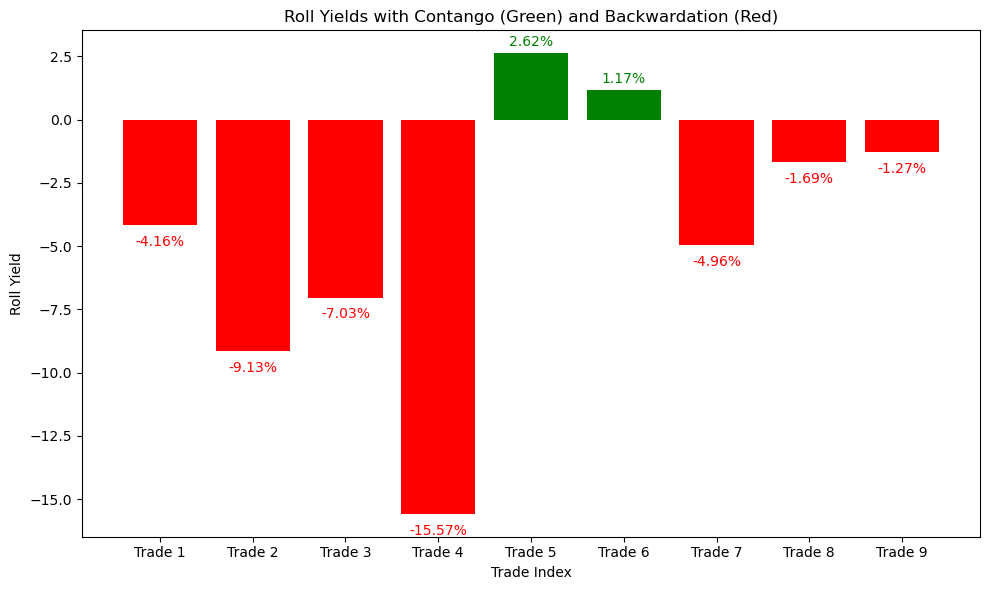

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file that contains the data
df = pd.read_csv("VxTerm.csv")

# Function to calculate roll yield
def calculate_roll_yield(current_price, next_price):
    return (float(current_price) - float(next_price)) / float(current_price) * 100  # Calculate roll yield correctly

# Calculate roll yield for each pair of consecutive contracts and determine contango/backwardation
roll_yields = []
contango_backwardation = []
long_short = []  # Added column for long/short
contract_prices = []  # Added column for contract prices
for i in range(len(df) - 1):
    current_price = df.iloc[i]['lastPrice']
    next_price = df.iloc[i + 1]['lastPrice']
    
    # Check if 'lastPrice' is already a float or a string with 's' character
    if isinstance(current_price, float):
        current_price = float(current_price)
    else:
        # Remove 's' character if present and then convert to float
        current_price = float(current_price[:-1]) if current_price.endswith('s') else float(current_price)
    
    if isinstance(next_price, float):
        next_price = float(next_price)
    else:
        # Remove 's' character if present and then convert to float
        next_price = float(next_price[:-1]) if next_price.endswith('s') else float(next_price)
    
    roll_yield = calculate_roll_yield(current_price, next_price)
    roll_yields.append(roll_yield)
    
    if roll_yield > 0:
        contango_backwardation.append("Contango")
        long_short.append("Long (Green)")
    elif roll_yield < 0:
        contango_backwardation.append("Backwardation")
        long_short.append("Short (Red)")
    else:
        contango_backwardation.append("No Change")
        long_short.append("No Trade")

# Create a bar plot with green and red bars
colors = ['green' if ry > 0 else 'red' for ry in roll_yields]

# Plot the roll yields
plt.figure(figsize=(10, 6))
plt.bar(range(len(roll_yields)), roll_yields, color=colors)

# Annotate the roll yield values
for i, (ry, color) in enumerate(zip(roll_yields, colors)):
    plt.annotate(f"{ry:.2f}%", (i, ry), textcoords="offset points", xytext=(0, 5 if ry > 0 else -15), ha='center', fontsize=10, color=color)

# Set plot labels and title
plt.xlabel("Trade Index")
plt.ylabel("Roll Yield")
plt.title("Roll Yields with Contango (Green) and Backwardation (Red)")

# Show the plot
plt.xticks(range(len(roll_yields)), [f"Trade {i+1}" for i in range(len(roll_yields))])
plt.tight_layout()
plt.show()


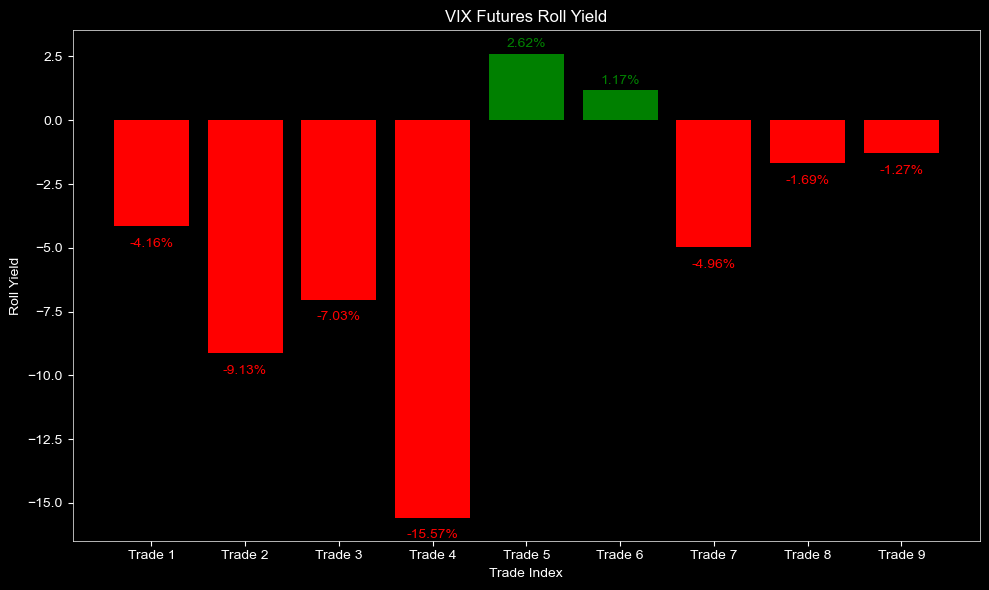

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file that contains the data
df = pd.read_csv("VxTerm.csv")

# Function to calculate roll yield
def calculate_roll_yield(current_price, next_price):
    return (float(current_price) - float(next_price)) / float(current_price) * 100  # Calculate roll yield correctly

# Calculate roll yield for each pair of consecutive contracts and determine contango/backwardation
roll_yields = []
contango_backwardation = []
long_short = []  # Added column for long/short
for i in range(len(df) - 1):
    current_price = df.iloc[i]['lastPrice']
    next_price = df.iloc[i + 1]['lastPrice']

    # Check if 'lastPrice' is already a float or a string with 's' character
    if isinstance(current_price, float):
        current_price = float(current_price)
    else:
        # Remove 's' character if present and then convert to float
        current_price = float(current_price[:-1]) if current_price.endswith('s') else float(current_price)

    if isinstance(next_price, float):
        next_price = float(next_price)
    else:
        # Remove 's' character if present and then convert to float
        next_price = float(next_price[:-1]) if next_price.endswith('s') else float(next_price)

    roll_yield = calculate_roll_yield(current_price, next_price)
    roll_yields.append(roll_yield)

    if roll_yield > 0:
        contango_backwardation.append("Contango")
        long_short.append("Long (Green)")
    elif roll_yield < 0:
        contango_backwardation.append("Backwardation")
        long_short.append("Short (Red)")
    else:
        contango_backwardation.append("No Change")
        long_short.append("No Trade")

# Create a bar plot with green and red bars
colors = ['green' if ry > 0 else 'red' for ry in roll_yields]

# Set Bloomberg Terminal style parameters
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.linewidth'] = 0.5

# Plot the roll yields
plt.figure(figsize=(10, 6))
plt.bar(range(len(roll_yields)), roll_yields, color=colors)

# Annotate the roll yield values
for i, (ry, color) in enumerate(zip(roll_yields, colors)):
    plt.annotate(f"{ry:.2f}%", (i, ry), textcoords="offset points", xytext=(0, 5 if ry > 0 else -15), ha='center', fontsize=10, color=color)

# Set plot labels and title
plt.xlabel("Trade Index")
plt.ylabel("Roll Yield")
plt.title("VIX Futures Roll Yield")

# Show the plot
plt.xticks(range(len(roll_yields)), [f"Trade {i+1}" for i in range(len(roll_yields))])
plt.tight_layout()
plt.show()


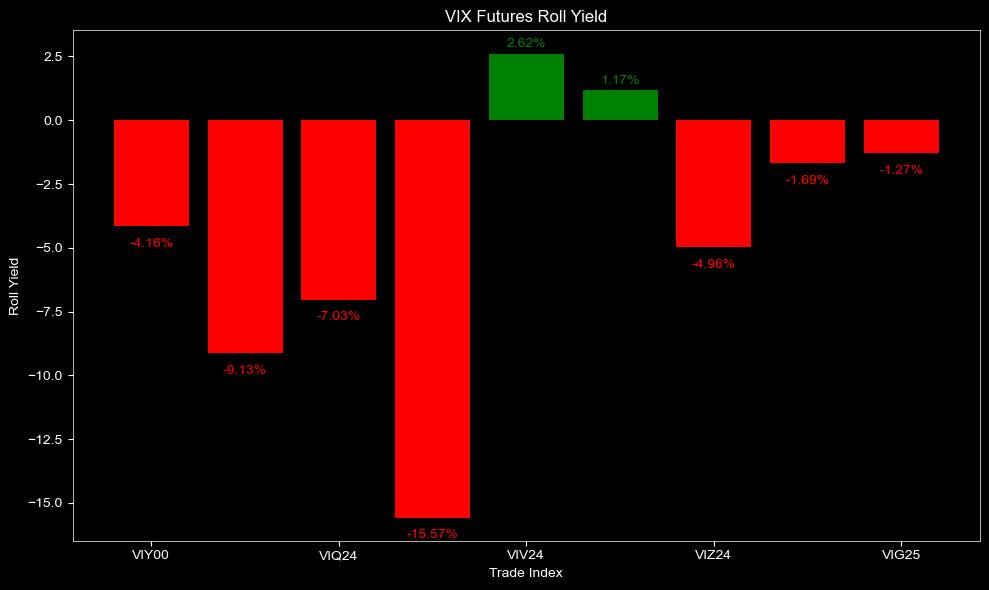

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file that contains the data
df = pd.read_csv("VxTerm.csv")

# Function to calculate roll yield
def calculate_roll_yield(current_price, next_price):
    return (float(current_price) - float(next_price)) / float(current_price) * 100  # Calculate roll yield correctly

# Calculate roll yield for each pair of consecutive contracts and determine contango/backwardation
roll_yields = []
contango_backwardation = []
long_short = []  # Added column for long/short
for i in range(len(df) - 1):
    current_price = df.iloc[i]['lastPrice']
    next_price = df.iloc[i + 1]['lastPrice']
    
    # Check if 'lastPrice' is already a float or a string with 's' character
    if isinstance(current_price, float):
        current_price = float(current_price)
    else:
        # Remove 's' character if present and then convert to float
        current_price = float(current_price[:-1]) if current_price.endswith('s') else float(current_price)
    
    if isinstance(next_price, float):
        next_price = float(next_price)
    else:
        # Remove 's' character if present and then convert to float
        next_price = float(next_price[:-1]) if next_price.endswith('s') else float(next_price)
    
    roll_yield = calculate_roll_yield(current_price, next_price)
    roll_yields.append(roll_yield)
    
    if roll_yield > 0:
        contango_backwardation.append("Contango")
        long_short.append("Long (Green)")
    elif roll_yield < 0:
        contango_backwardation.append("Backwardation")
        long_short.append("Short (Red)")
    else:
        contango_backwardation.append("No Change")
        long_short.append("No Trade")

# Create a bar plot with green and red bars
colors = ['green' if ry > 0 else 'red' for ry in roll_yields]

# Set Bloomberg Terminal style parameters
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.linewidth'] = 0.5

# Plot the roll yields
plt.figure(figsize=(10, 6))
plt.bar(range(len(roll_yields)), roll_yields, color=colors)

# Annotate the roll yield values
for i, (ry, color) in enumerate(zip(roll_yields, colors)):
    plt.annotate(f"{ry:.2f}%", (i, ry), textcoords="offset points", xytext=(0, 5 if ry > 0 else -15), ha='center', fontsize=10, color=color)

# Set plot labels and title
plt.xlabel("Trade Index")
plt.ylabel("Roll Yield")
plt.title("VIX Futures Roll Yield")

# Customize x-axis tick labels
tick_positions = range(0, len(roll_yields), 2)
tick_labels = [f"VX{i}-{i+1}" if isinstance(df.iloc[i]['lastPrice'], str) else df.iloc[i]['symbol'] for i in tick_positions]
plt.xticks(tick_positions, tick_labels)

# Show the plot
plt.tight_layout()
plt.show()


NameError: name 'symbols' is not defined

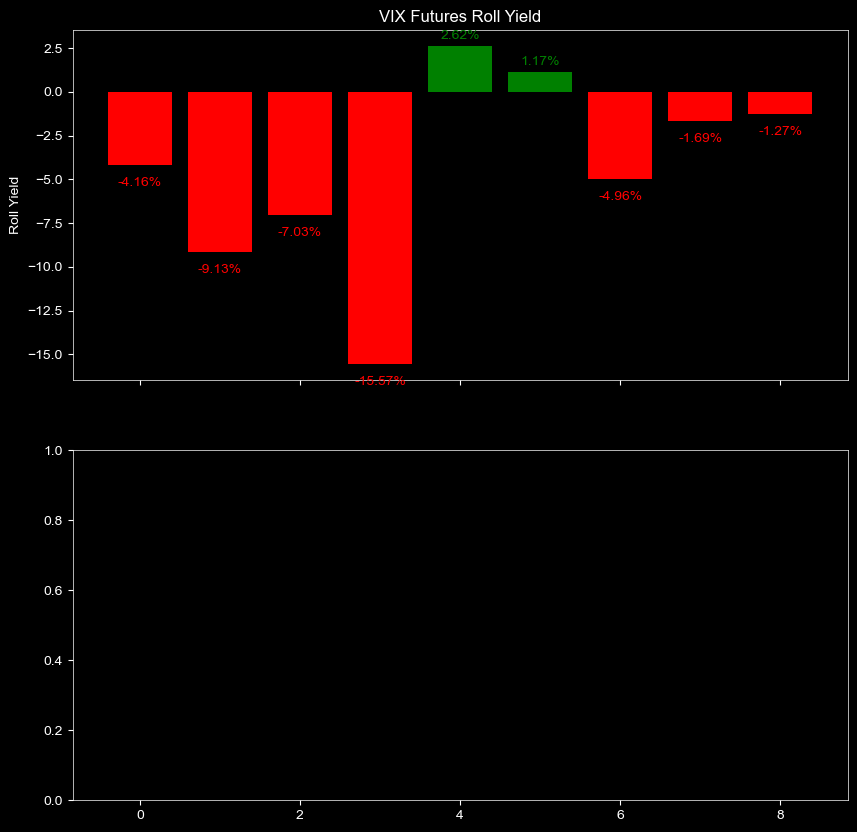

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import csv

# Load the CSV file that contains the data
df = pd.read_csv("VxTerm.csv")

# Function to calculate roll yield
def calculate_roll_yield(current_price, next_price):
    return (float(current_price) - float(next_price)) / float(current_price) * 100  # Calculate roll yield correctly

# Calculate roll yield for each pair of consecutive contracts and determine contango/backwardation
roll_yields = []
contango_backwardation = []
long_short = []  # Added column for long/short
for i in range(len(df) - 1):
    current_price = df.iloc[i]['lastPrice']
    next_price = df.iloc[i + 1]['lastPrice']
    
    # Check if 'lastPrice' is already a float or a string with 's' character
    if isinstance(current_price, float):
        current_price = float(current_price)
    else:
        # Remove 's' character if present and then convert to float
        current_price = float(current_price[:-1]) if current_price.endswith('s') else float(current_price)
    
    if isinstance(next_price, float):
        next_price = float(next_price)
    else:
        # Remove 's' character if present and then convert to float
        next_price = float(next_price[:-1]) if next_price.endswith('s') else float(next_price)
    
    roll_yield = calculate_roll_yield(current_price, next_price)
    roll_yields.append(roll_yield)
    
    if roll_yield > 0:
        contango_backwardation.append("Contango")
        long_short.append("Long (Green)")
    elif roll_yield < 0:
        contango_backwardation.append("Backwardation")
        long_short.append("Short (Red)")
    else:
        contango_backwardation.append("No Change")
        long_short.append("No Trade")

# Create a bar plot with green and red bars for roll yields
colors = ['green' if ry > 0 else 'red' for ry in roll_yields]

# Set Bloomberg Terminal style parameters
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.linewidth'] = 0.5

# Plot the roll yields
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)  # Create subplots

# First subplot for roll yields
axs[0].bar(range(len(roll_yields)), roll_yields, color=colors)

# Annotate the roll yield values
for i, (ry, color) in enumerate(zip(roll_yields, colors)):
    axs[0].annotate(f"{ry:.2f}%", (i, ry), textcoords="offset points", xytext=(0, 5 if ry > 0 else -15), ha='center', fontsize=10, color=color)

# Set plot labels and title for the first subplot
axs[0].set_ylabel("Roll Yield")
axs[0].set_title("VIX Futures Roll Yield")

# Corrected code for setting x-axis tick labels for the first subplot
# Set x-axis ticks and labels based on the symbols list
axs[0].set_xticks(range(len(symbols) - 1))  # Exclude the last symbol
axs[0].set_xticklabels(symbols[:-1], rotation=45)  # Rotate x-axis labels for better readability



# Second subplot for price data
symbols = []
prices = []
timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

with open("VxTerm.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        symbols.append(row['symbol'])
        price = row['lastPrice']
        if isinstance(price, float):
            prices.append(price)
        else:
            prices.append(float(price.replace("s", "")))

x = np.arange(len(prices))

axs[1].plot(x, prices, color='orange', marker='o', markersize=5)
axs[1].set_xticks(x)
axs[1].set_xticklabels(symbols, fontsize=7)

for i, j in zip(x, prices):
    axs[1].annotate(f"{j:.2f}", (i, j), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=7)

# Set plot labels and title for the second subplot
axs[1].set_xlabel("Symbol", fontsize=12)
axs[1].set_ylabel("Price", fontsize=12)
axs[1].set_title("VIX TERM-STRUCTURE")

# Add timestamp to the second subplot
axs[1].text(0.5, 0.05, timestamp, ha='right', fontsize=10, transform=axs[1].transAxes)

# Adjust subplot layout
plt.tight_layout()

# Show the combined plots
plt.show()


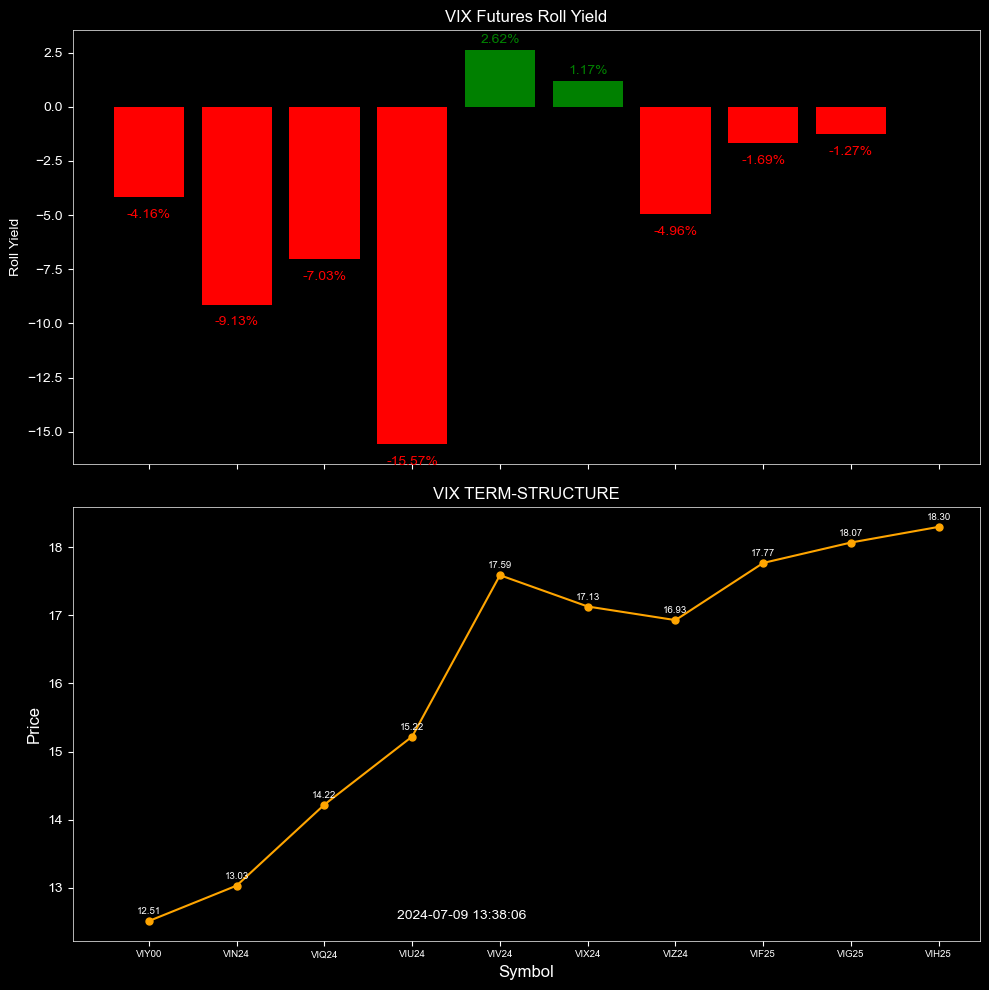

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import csv

# Load the CSV file that contains the data
df = pd.read_csv("VxTerm.csv")

# Function to calculate roll yield
def calculate_roll_yield(current_price, next_price):
    return (float(current_price) - float(next_price)) / float(current_price) * 100  # Calculate roll yield correctly

# Calculate roll yield for each pair of consecutive contracts and determine contango/backwardation
roll_yields = []
contango_backwardation = []
long_short = []  # Added column for long/short
for i in range(len(df) - 1):
    current_price = df.iloc[i]['lastPrice']
    next_price = df.iloc[i + 1]['lastPrice']
    
    # Check if 'lastPrice' is already a float or a string with 's' character
    if isinstance(current_price, float):
        current_price = float(current_price)
    else:
        # Remove 's' character if present and then convert to float
        current_price = float(current_price[:-1]) if current_price.endswith('s') else float(current_price)
    
    if isinstance(next_price, float):
        next_price = float(next_price)
    else:
        # Remove 's' character if present and then convert to float
        next_price = float(next_price[:-1]) if next_price.endswith('s') else float(next_price)
    
    roll_yield = calculate_roll_yield(current_price, next_price)
    roll_yields.append(roll_yield)
    
    if roll_yield > 0:
        contango_backwardation.append("Contango")
        long_short.append("Long (Green)")
    elif roll_yield < 0:
        contango_backwardation.append("Backwardation")
        long_short.append("Short (Red)")
    else:
        contango_backwardation.append("No Change")
        long_short.append("No Trade")

# Create a bar plot with green and red bars for roll yields
colors = ['green' if ry > 0 else 'red' for ry in roll_yields]

# Set Bloomberg Terminal style parameters
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.linewidth'] = 0.5

# Plot the roll yields
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)  # Create subplots

# First subplot for roll yields
axs[0].bar(range(len(roll_yields)), roll_yields, color=colors)

# Annotate the roll yield values
for i, (ry, color) in enumerate(zip(roll_yields, colors)):
    axs[0].annotate(f"{ry:.2f}%", (i, ry), textcoords="offset points", xytext=(0, 5 if ry > 0 else -15), ha='center', fontsize=10, color=color)

# Set plot labels and title for the first subplot
axs[0].set_ylabel("Roll Yield")
axs[0].set_title("VIX Futures Roll Yield")

# Corrected code for setting x-axis tick labels for the first subplot
# Set x-axis ticks and labels based on the symbols list
axs[0].set_xticks(range(len(contango_backwardation) - 1))  # Exclude the last contract
axs[0].set_xticklabels(contango_backwardation[:-1], rotation=45)  # Rotate x-axis labels for better readability

# Second subplot for price data
symbols = []
prices = []
timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

with open("VxTerm.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        symbols.append(row['symbol'])
        price = row['lastPrice']
        if isinstance(price, float):
            prices.append(price)
        else:
            prices.append(float(price.replace("s", "")))

x = np.arange(len(prices))

axs[1].plot(x, prices, color='orange', marker='o', markersize=5)
axs[1].set_xticks(x)
axs[1].set_xticklabels(symbols, fontsize=7)

for i, j in zip(x, prices):
    axs[1].annotate(f"{j:.2f}", (i, j), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=7)

# Set plot labels and title for the second subplot
axs[1].set_xlabel("Symbol", fontsize=12)
axs[1].set_ylabel("Price", fontsize=12)
axs[1].set_title("VIX TERM-STRUCTURE")

# Add timestamp to the second subplot
axs[1].text(0.5, 0.05, timestamp, ha='right', fontsize=10, transform=axs[1].transAxes)

# Adjust subplot layout
plt.tight_layout()

# Show the combined plots
plt.show()


In [44]:
import pandas as pd
import requests
from urllib.parse import unquote
from IPython.display import display, HTML

# Set display options
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0",
}

def main(url):
    with requests.Session() as req:
        req.headers.update(headers)
        r = req.get(url[:25])
        req.headers.update(
            {'X-XSRF-TOKEN': unquote(r.cookies.get_dict()['XSRF-TOKEN'])})
        params = {
            "list": "futures.contractInRoot",
            'root': 'VI',
            "fields": "symbol,symbolName,lastPrice,priceChange,percentChange,lastUpdate,volume,openInterest",
            "orderBy": "expiration",
            "orderDir": "desc",
            "hasOptions": "true",
            "page": "1",
            "limit": "500",
            "raw": "1"
        }
        r = req.get(url, params=params).json()
        df = pd.DataFrame(r['data'])

        # Remove non-numeric characters from priceChange and percentChange columns
        df['priceChange'] = df['priceChange'].str.replace(r'[^\d.-]+', '', regex=True)
        df['percentChange'] = df['percentChange'].str.replace(r'[^\d.-]+', '', regex=True)

        # Replace empty strings with NaN in priceChange and percentChange columns
        df['priceChange'] = df['priceChange'].replace('', pd.NA)
        df['percentChange'] = df['percentChange'].replace('', pd.NA)

        # Convert priceChange and percentChange columns to float
        df['priceChange'] = pd.to_numeric(df['priceChange'], errors='coerce')
        df['percentChange'] = pd.to_numeric(df['percentChange'], errors='coerce')

        # Exclude the 'raw' column
        df = df.drop('raw', axis=1)

        # Apply conditional formatting to priceChange and percentChange columns
        styled_df = df.style.format({'percentChange': '{:.2f}%'}).applymap(
            lambda x: 'color: green' if x > 0 else ('color: red' if x < 0 else 'color: grey'),
            subset=['priceChange', 'percentChange']
        ).format({'percentChange': lambda x: f"{x}%"})

        # Display the styled dataframe
        display(styled_df)

        # Save DataFrame to CSV
        df.to_csv("VxTerm.csv", index=False)

main('https://www.barchart.com/proxies/core-api/v1/quotes/get?')


,symbol,symbolName,lastPrice,priceChange,percentChange,lastUpdate,volume,openInterest
0,VIY00,S&P 500 VIX,12.51,0.140000,1.13%,07/09/24 15:33:58,N/A,N/A
1,VIN24,S&P 500 VIX,13.0000,-0.082000,-0.63%,07/09/24 15:33:58,"68,112","143,829"
2,VIQ24,S&P 500 VIX,14.2200,0.038200,0.27%,07/09/24 15:33:58,"52,596","136,011"
3,VIU24,S&P 500 VIX,15.2200,0.109100,0.72%,07/09/24 15:33:58,"20,875","78,226"
4,VIV24,S&P 500 VIX,17.5900,0.089000,0.51%,07/09/24 15:33:58,"10,536","46,572"
5,VIX24,S&P 500 VIX,17.1300,0.030000,0.18%,07/09/24 15:33:58,"7,145","37,106"
6,VIZ24,S&P 500 VIX,16.9300,-0.020000,-0.12%,07/09/24 15:33:58,"3,779","14,261"
7,VIF25,S&P 500 VIX,17.7700,0.220000,1.25%,07/09/24 15:33:58,"1,374","4,603"
8,VIG25,S&P 500 VIX,18.0700,0.095000,0.53%,07/09/24 15:33:58,216,0
9,VIH25,S&P 500 VIX,18.3000,0.050000,0.27%,07/09/24 15:33:58,7,0


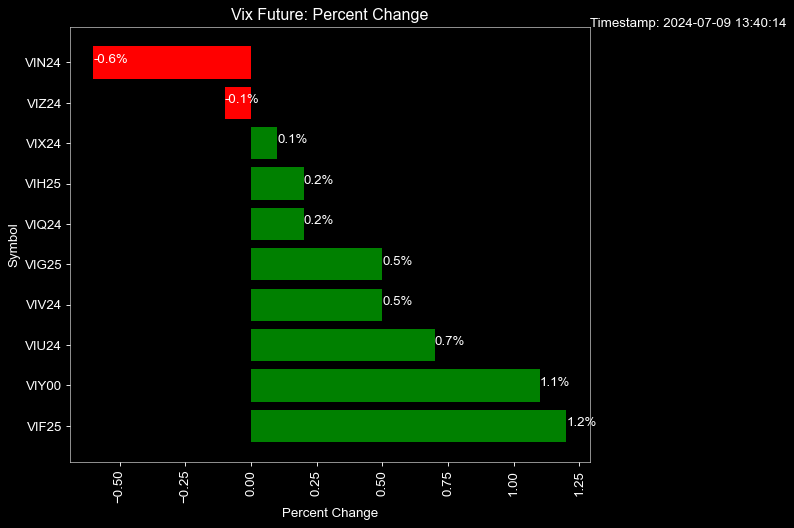

In [46]:
import matplotlib.pyplot as plt
import csv

plt.style.use('dark_background')

# Set the figure size and font size
plt.figure(figsize=(10,8), dpi=80)
plt.rc('font', size=12)

# Read the csv file
filename = '/Users/brucegalbraith/Documents/GitHub/Stock_Analysis_For_Quant/Python_Stock/Portfolio_Strategies/VxTerm.csv'
symbols = []
percentChange = []
with open(filename, 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        symbols.append(row['symbol'])
        percent_change = row['percentChange']
        if percent_change != 'unc' and percent_change != '':
            percentChange.append(float(percent_change[:-1]))

# Sort the data based on percentChange
data = sorted(zip(symbols, percentChange), key=lambda x: x[1], reverse=True)
symbols, percentChange = zip(*data)

# Create a horizontal bar chart
plt.barh(symbols, percentChange, color=['green' if x > 0 else 'red' for x in percentChange], align='center')

# Add labels and title
plt.xlabel('Percent Change')
plt.ylabel('Symbol')
plt.title('Vix Future: Percent Change')

# Add labels with the percentChange values to each bar
for i, v in enumerate(percentChange):
    plt.text(v, i, str(v) + '%')

# Rotate the x-axis labels and set the space between bars
plt.xticks(rotation=90)
plt.subplots_adjust(left=0.25, bottom=0.2)
import datetime

# Get the current time
now = datetime.datetime.now()

# Add the timestamp to the plot
plt.text(1, 1, 'Timestamp: {}'.format(now.strftime('%Y-%m-%d %H:%M:%S')), transform=plt.gca().transAxes)

# Show the plot
plt.show()


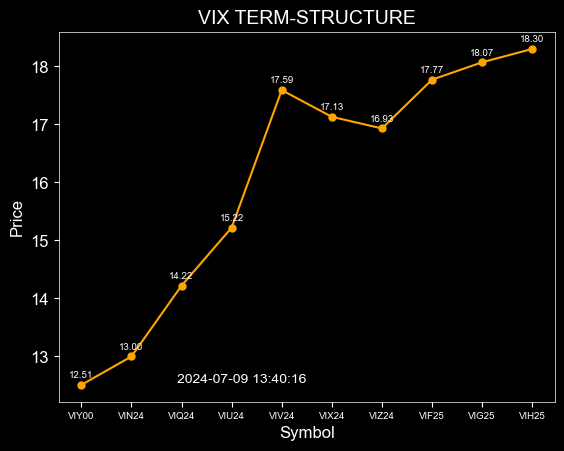

In [48]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import datetime

symbols = []
prices = []
timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

with open("VxTerm.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        symbols.append(row['symbol'])
        prices.append(float(row['lastPrice'].replace("s","")))

x = np.arange(len(prices))
fig, ax = plt.subplots()

ax.plot(x, prices, color='orange', marker='o', markersize=5)
ax.set_xticks(x)
ax.set_xticklabels(symbols, fontsize=7)

for i, j in zip(x, prices):
    ax.annotate(f"{j:.2f}", (i,j), xytext=(0,5), textcoords='offset points', ha='center', fontsize=7)

plt.title('VIX TERM-STRUCTURE', fontsize=14)
plt.xlabel('Symbol', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.text(0.5, 0.05, timestamp, ha='right', fontsize=10, transform=ax.transAxes)

plt.show()


In [50]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)
import requests
from urllib.parse import unquote
import pandas as pd
import requests
from urllib.parse import unquote
import pandas as pd 

headers = {
	"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0",
}



def main(url):
	with requests.Session() as req:
		req.headers.update(headers)
		r = req.get(url[:25])
		req.headers.update(
			{'X-XSRF-TOKEN': unquote(r.cookies.get_dict()['XSRF-TOKEN'])})
		params = {
			"list": "futures.contractInRoot",
			'root': 'VI',
			"fields": "symbol,symbolName,lastPrice,priceChange,percentChange,lastUpdate",
			"orderBy": "expiration",
			"orderDir": "desc",
			"between(lastPrice,.10,)": "",
			"between(tradeTime,2022-01-01,2022-12-30)": "",
			"meta": "field.shortName,field.type,field.description",
			"hasOptions": "true",
			"page": "1",
			"limit": "500",
			"raw": "1"
		}
		r = req.get(url, params=params).json()
		df = pd.DataFrame(r['data']).iloc[:, :-1]
		print(df)
		
		
main('https://www.barchart.com/proxies/core-api/v1/quotes/get?')

  symbol   symbolName lastPrice priceChange percentChange         lastUpdate
0  VIY00  S&P 500 VIX     12.51       +0.14        +1.13%  07/09/24 15:33:58
1  VIN24  S&P 500 VIX   13.0000     -0.0820        -0.63%  07/09/24 15:33:58
2  VIQ24  S&P 500 VIX   14.2200     +0.0382        +0.27%  07/09/24 15:33:58
3  VIU24  S&P 500 VIX   15.2200     +0.1091        +0.72%  07/09/24 15:33:58
4  VIV24  S&P 500 VIX   17.5900     +0.0890        +0.51%  07/09/24 15:33:58
5  VIX24  S&P 500 VIX   17.1300     +0.0300        +0.18%  07/09/24 15:33:58
6  VIZ24  S&P 500 VIX   16.9300     -0.0200        -0.12%  07/09/24 15:33:58
7  VIF25  S&P 500 VIX   17.7700     +0.2200        +1.25%  07/09/24 15:33:58
8  VIG25  S&P 500 VIX   18.0700     +0.0950        +0.53%  07/09/24 15:33:58
9  VIH25  S&P 500 VIX   18.3000     +0.0500        +0.27%  07/09/24 15:33:58


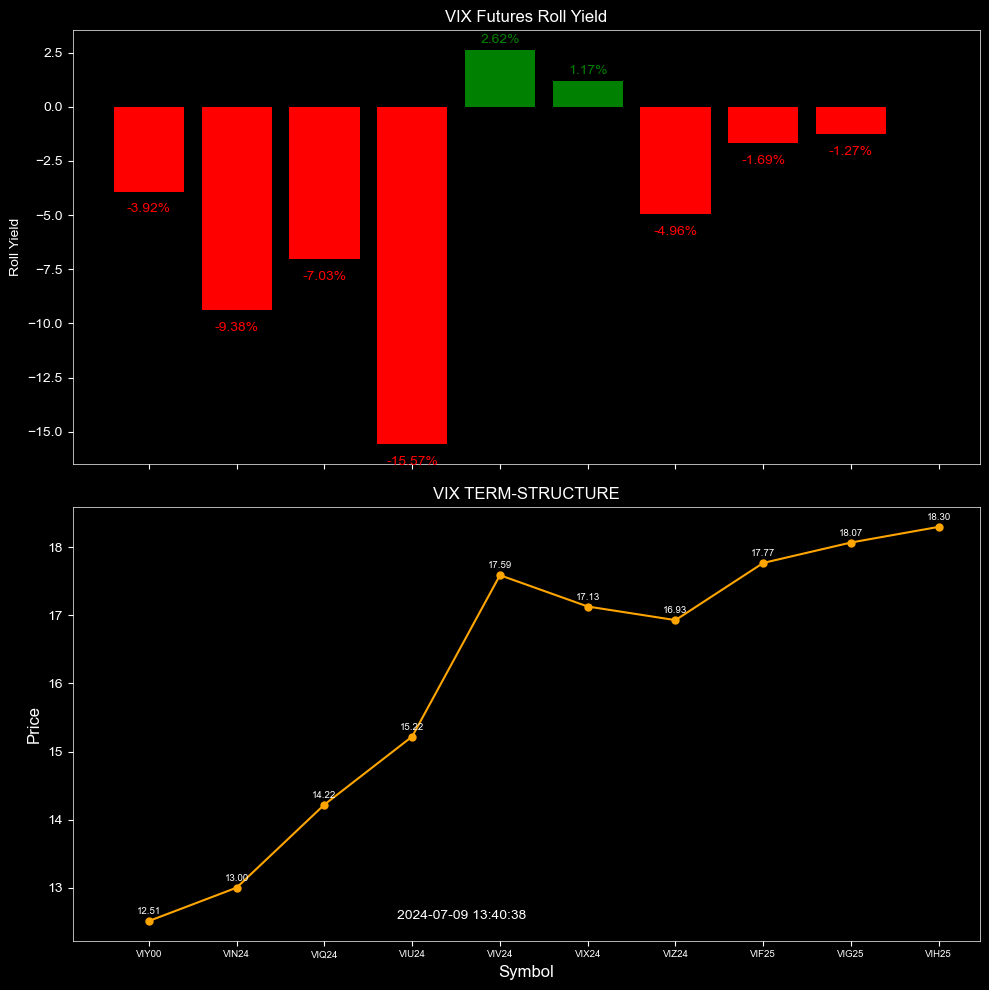

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import requests
from urllib.parse import unquote

# Configuration for better display in console
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

# Headers for the API request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0",
}

# Function to fetch live data from the API
def fetch_live_data(url):
    with requests.Session() as req:
        req.headers.update(headers)
        r = req.get(url[:25])
        req.headers.update({'X-XSRF-TOKEN': unquote(r.cookies.get_dict()['XSRF-TOKEN'])})
        params = {
            "list": "futures.contractInRoot",
            'root': 'VI',
            "fields": "symbol,symbolName,lastPrice,priceChange,percentChange,lastUpdate",
            "orderBy": "expiration",
            "orderDir": "desc",
            "between(lastPrice,.10,)": "",
            "between(tradeTime,2024-01-01,2024-12-30)": "",
            "meta": "field.shortName,field.type,field.description",
            "hasOptions": "true",
            "page": "1",
            "limit": "500",
            "raw": "1"
        }
        r = req.get(url, params=params).json()
        df = pd.DataFrame(r['data'])
        return df

# Calculate roll yield
def calculate_roll_yield(current_price, next_price):
    return (float(current_price) - float(next_price)) / float(current_price) * 100

# Main function to process data and generate plots
def main():
    url = 'https://www.barchart.com/proxies/core-api/v1/quotes/get?'
    df = fetch_live_data(url)
    
    roll_yields = []
    contango_backwardation = []
    long_short = []
    
    for i in range(len(df) - 1):
        current_price = df.iloc[i]['lastPrice']
        next_price = df.iloc[i + 1]['lastPrice']
        
        current_price = float(current_price[:-1]) if isinstance(current_price, str) and current_price.endswith('s') else float(current_price)
        next_price = float(next_price[:-1]) if isinstance(next_price, str) and next_price.endswith('s') else float(next_price)
        
        roll_yield = calculate_roll_yield(current_price, next_price)
        roll_yields.append(roll_yield)
        
        if roll_yield > 0:
            contango_backwardation.append("Contango")
            long_short.append("Long (Green)")
        elif roll_yield < 0:
            contango_backwardation.append("Backwardation")
            long_short.append("Short (Red)")
        else:
            contango_backwardation.append("No Change")
            long_short.append("No Trade")

    # Plotting
    colors = ['green' if ry > 0 else 'red' for ry in roll_yields]

    plt.style.use('dark_background')
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelcolor'] = 'white'
    plt.rcParams['xtick.color'] = 'white'
    plt.rcParams['ytick.color'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'white'
    plt.rcParams['axes.linewidth'] = 0.5

    fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

    axs[0].bar(range(len(roll_yields)), roll_yields, color=colors)

    for i, (ry, color) in enumerate(zip(roll_yields, colors)):
        axs[0].annotate(f"{ry:.2f}%", (i, ry), textcoords="offset points", xytext=(0, 5 if ry > 0 else -15), ha='center', fontsize=10, color=color)

    axs[0].set_ylabel("Roll Yield")
    axs[0].set_title("VIX Futures Roll Yield")

    axs[0].set_xticks(range(len(contango_backwardation) - 1))
    axs[0].set_xticklabels(contango_backwardation[:-1], rotation=45)

    symbols = []
    prices = []
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    for _, row in df.iterrows():
        symbols.append(row['symbol'])
        prices.append(float(row['lastPrice'].replace("s", "")))

    x = np.arange(len(prices))

    axs[1].plot(x, prices, color='orange', marker='o', markersize=5)
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(symbols, fontsize=7)

    for i, j in zip(x, prices):
        axs[1].annotate(f"{j:.2f}", (i, j), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=7)

    axs[1].set_xlabel("Symbol", fontsize=12)
    axs[1].set_ylabel("Price", fontsize=12)
    axs[1].set_title("VIX TERM-STRUCTURE")

    axs[1].text(0.5, 0.05, timestamp, ha='right', fontsize=10, transform=axs[1].transAxes)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()